# Employee Churn Analysis - Feature Engineering
---


- Age: Çalışanın yaşı (sayısal değer)
- Attrition: İşten ayrılma durumu (Yes/Evet veya No/Hayır)
- BusinessTravel: İş seyahati sıklığı (Travel_Rarely/Nadiren seyahat, Travel_Frequently/Sık sık seyahat, Non-Travel/Seyahat etmeme)
- DailyRate: Günlük ücret (sayısal değer)
- Department: Çalışanın çalıştığı departman (Sales/Satış, Research & Development/Araştırma ve Geliştirme, Human Resources/İnsan Kaynakları)
- DistanceFromHome: Evden işe olan mesafe (sayısal değer)
- Education: Eğitim düzeyi (sayısal değer)
- EducationField: Eğitim alanı (Life Sciences/Hayat Bilimleri, Technical Degree/Teknik Lisans, Human Resources/İnsan Kaynakları vb.)
- EmployeeCount: Çalışan sayısı (sabit değer)
- EmployeeNumber: Çalışan numarası (sayısal değer)
- EnvironmentSatisfaction: Çalışma ortamı memnuniyeti (sayısal değer)
- Gender: Cinsiyet (Female/Kadın veya Male/Erkek)
- HourlyRate: Saatlik ücret (sayısal değer)
- JobInvolvement: İşe dahil olma düzeyi (sayısal değer)
- JobLevel: İş seviyesi (sayısal değer)
- JobRole: İş rolü (Sales Executive/Satış Yöneticisi, Research Scientist/Araştırma Uzmanı vb.)
- JobSatisfaction: İş tatmini (sayısal değer)
- MaritalStatus: Medeni durum (Single/Bekar, Married/Evli, Divorced/Boşanmış)
- MonthlyIncome: Aylık gelir (sayısal değer)
- MonthlyRate: Aylık ücret (sayısal değer)
- NumCompaniesWorked: Çalışılan şirket sayısı (sayısal değer)
- Over18: 18 yaşından büyük olma durumu (Y/Evet)
- OverTime: Fazla mesai yapma durumu (Yes/Evet veya No/Hayır)
- PercentSalaryHike: Maaş artış yüzdesi (sayısal değer)
- PerformanceRating: Performans değerlendirmesi (sayısal değer)
- RelationshipSatisfaction: İlişki tatmini (sayısal değer)
- StandardHours: Standart çalışma saati (sabit değer)
- StockOptionLevel: Hisse senedi opsiyon düzeyi (sayısal değer)
- TotalWorkingYears: Toplam çalışma yılı (sayısal değer)
- TrainingTimesLastYear: Geçen yıl yapılan eğitim süresi (sayısal değer)
- WorkLifeBalance: İş-yaşam dengesi (sayısal değer)
- YearsAtCompany: Şirkette geçirilen yıl sayısı (sayısal değer)
- YearsInCurrentRole: Şu anki pozisyonda geçirilen yıl sayısı (sayısal değer)
- YearsSinceLastPromotion: Son terfi üzerinden geçen yıl sayısı (sayısal değer)
- YearsWithCurrManager: Mevcut yöneticiyle çalışılan yıl sayısı (sayısal değer)

---


In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, RobustScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [385]:
import warnings
warnings.simplefilter(action="ignore")

In [386]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [387]:
df_ = pd.read_csv("hr_churn.csv")
df=df_

In [388]:
##################################
# GENEL RESİM
##################################

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1470, 35)
##################### Types #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSa

In [389]:
df. describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [390]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [391]:
attritiond_df = pd.DataFrame(df["Attrition"].value_counts())
attritiond_df

,Attrition
No,1233
Yes,237


In [392]:
print(100 * df["Attrition"].value_counts() / len(df)) # yüzdesel olarak da  inceleyelim

No    83.88
Yes   16.12
Name: Attrition, dtype: float64


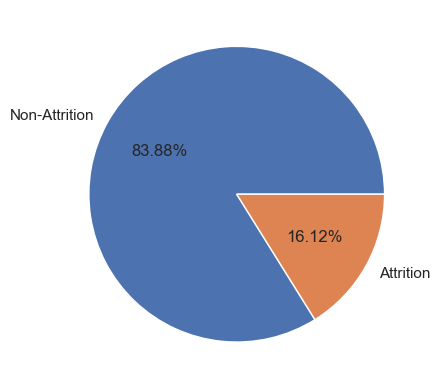

In [393]:
attrition_counts = df["Attrition"].value_counts()
attrition_pct = [100*attrition_counts[0]/(attrition_counts[0]+attrition_counts[1]), 
               100*attrition_counts[1]/(attrition_counts[0]+attrition_counts[1])]
labels = ["Non-Attrition", "Attrition"]

plt.pie(attrition_pct, labels=labels, autopct='%1.2f%%')
plt.show()

# Exploratory Data Analysis — Keşifsel Veri Analizi
---

In [394]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [395]:
# Her bir sütunda benzersiz değer sayısını hesapla
unique_counts = df.nunique()

# Sadece 1 veya daha az benzersiz değere sahip sütunları seç
selected_columns = unique_counts[unique_counts <= 1].index

# Seçilen sütunları yazdır
print(selected_columns)

# tüm veri setinde aynı değere sahipler veri setinde gerksiz durumda olduğundan çıkartabiliriz.

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [396]:
# Veri setinden seçilen sütunları çıkarttık.
df = df.drop(selected_columns, axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [397]:
attr_dummies =pd.get_dummies(df["Attrition"])
attr_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [398]:
df=pd.concat([df,attr_dummies],axis=1)

In [399]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,1,0


In [400]:
df= df.drop(["Attrition","No"],axis=1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


<AxesSubplot: xlabel='Gender', ylabel='Yes'>

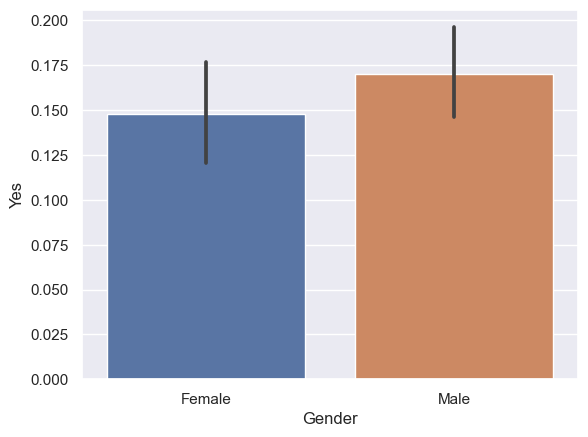

In [401]:
sns.barplot(x = "Gender", y = "Yes", data=df )

- Erkek çalışanların Kadın çalışanlara göre işten ayrılma durumdaları daha fazladır.

<AxesSubplot: xlabel='Department', ylabel='Yes'>

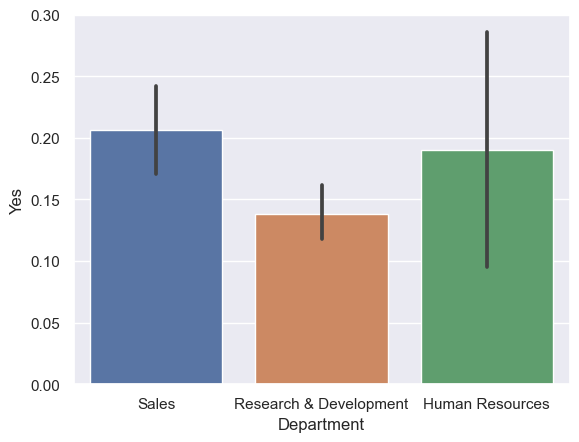

In [402]:
sns.barplot(x = "Department", y = "Yes", data=df )

- İnsan kaynakları ve Satış departmanlarında işten ayrılmaların daha fazla olduğunu gözlemleyebiliriyoruz.

<AxesSubplot: xlabel='BusinessTravel', ylabel='Yes'>

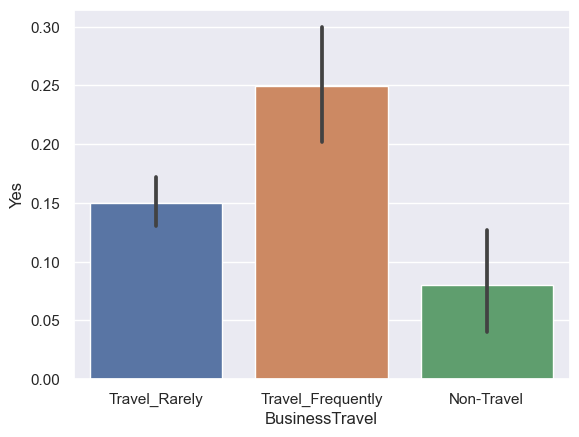

In [403]:
sns.barplot(x = "BusinessTravel", y = "Yes", data=df )

- Sıklıkla  iş seyahatine çıkanların işten ayrılmaları daha fazla olduğunu  gözlemleyebiliriz.

<AxesSubplot: xlabel='EducationField', ylabel='Yes'>

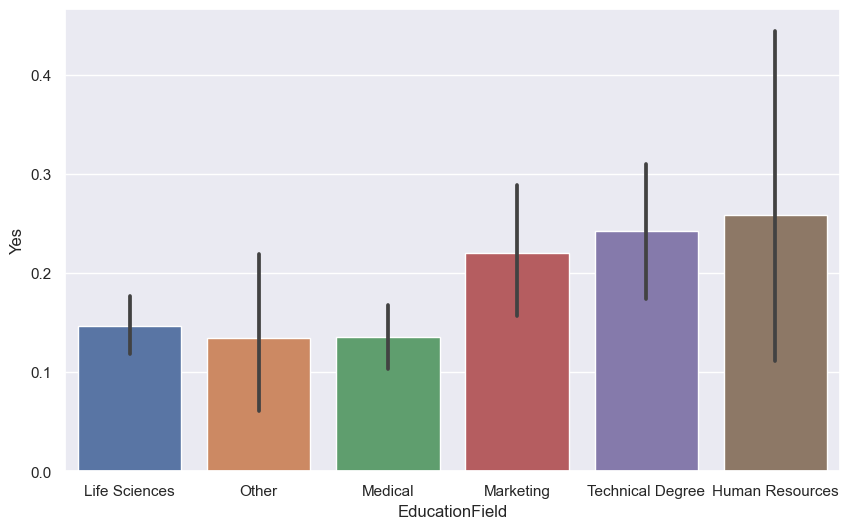

In [404]:
plt.figure(figsize=(10, 6))
sns.barplot(x = "EducationField", y = "Yes", data=df )

- Eğitim alanına göre  işten ayrılma durumunu incelediğimizde sırasıyla  HR ,Technical Degree ve Marketing alanlarıdan ayrılma durumu fazladır.

<AxesSubplot: xlabel='MaritalStatus', ylabel='Yes'>

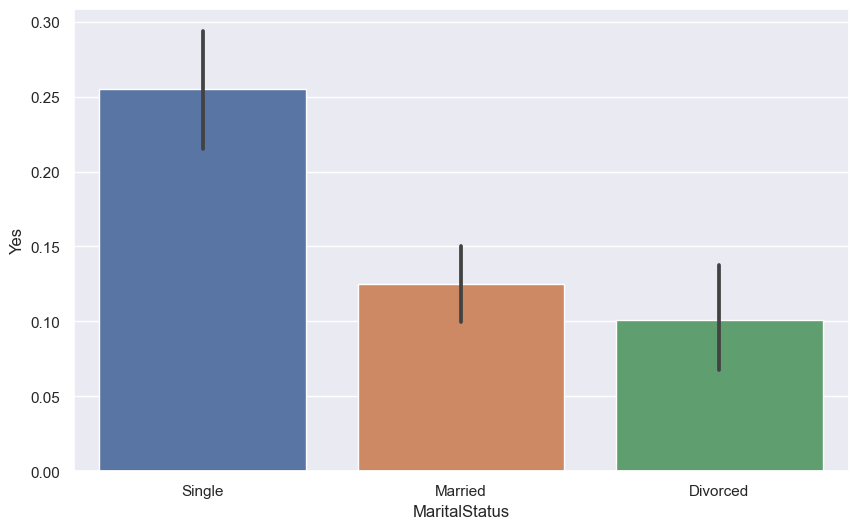

In [405]:
plt.figure(figsize=(10, 6))
sns.barplot(x = "MaritalStatus", y = "Yes", data=df )

- Bekar olan çalışanların işten ayrılma durumları daha fazla olduğu görünmektedir.

<AxesSubplot: xlabel='OverTime', ylabel='Yes'>

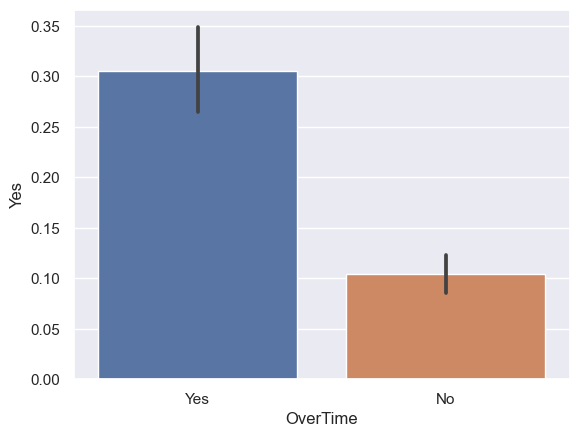

In [406]:
sns.barplot(x = "OverTime", y = "Yes", data=df )

- Fazla mesai yapan kişilerin işten ayrılma  durumlarının çok daha  fazla olduğunu görebiliyoruz.

<AxesSubplot: xlabel='DistanceFromHome', ylabel='Yes'>

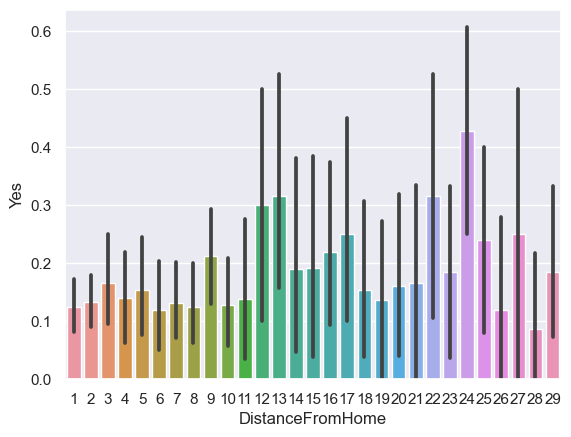

In [407]:
sns.barplot(x = "DistanceFromHome", y = "Yes", data=df )

- Eve olan uzaklık arttıkça işetn ayrılma durumu biraz daha artmış

<AxesSubplot: xlabel='EnvironmentSatisfaction', ylabel='Yes'>

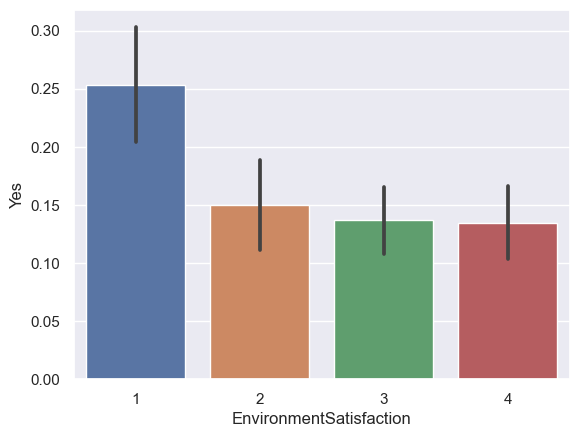

In [408]:
sns.barplot(x = "EnvironmentSatisfaction", y = "Yes", data=df )

- 1 Numaralı çalışma alanında çalışanların işten ayrılma durumları daha fazla

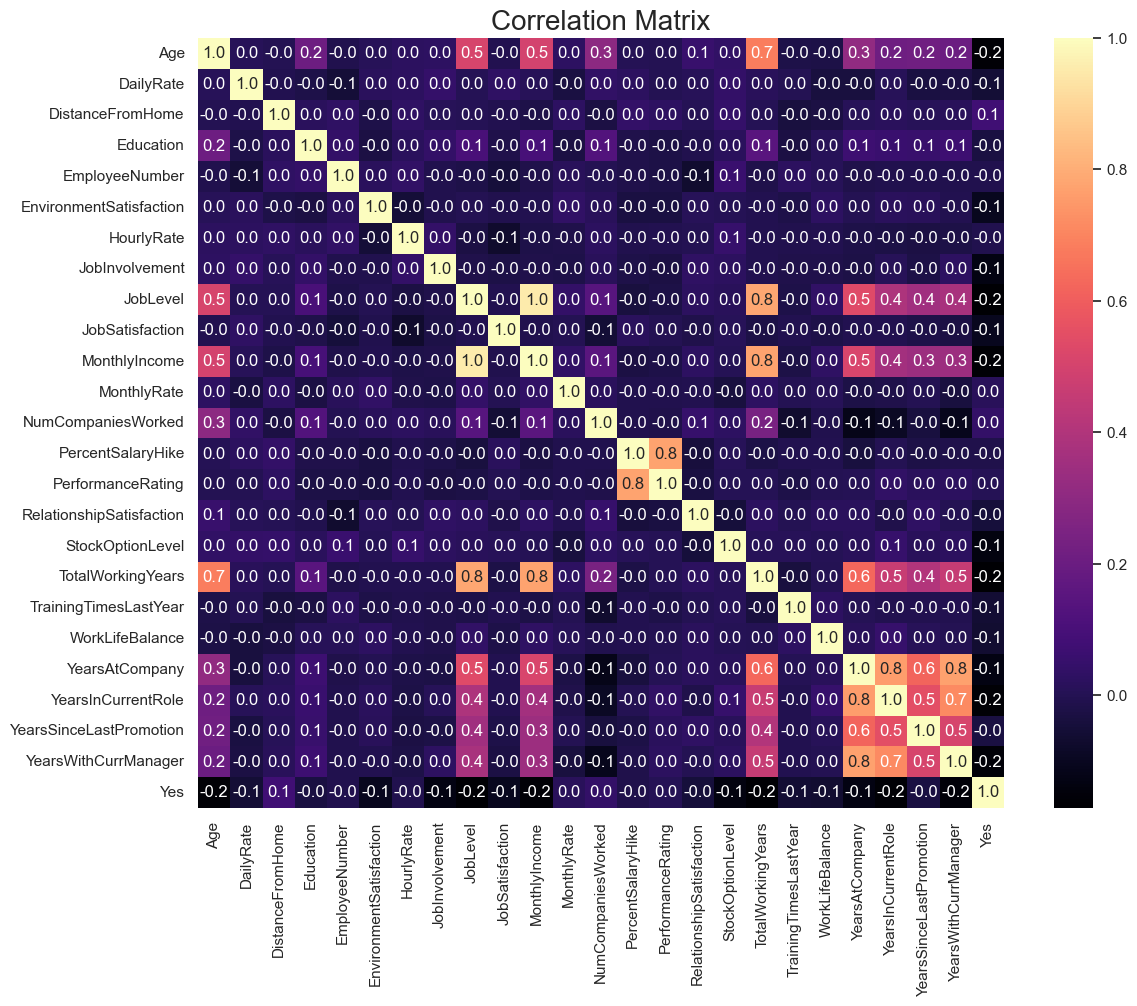

In [409]:
# Figure boyutunu ayarla
plt.figure(figsize=(13, 10))

# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Heatmap oluştur
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="magma")

# Grafik başlığını ayarla
ax.set_title("Correlation Matrix", fontsize=20)

# Grafiği göster
plt.show()

In [410]:
correlation_matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
Age,1.00,0.01,-0.00,0.21,-0.01,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20,-0.16
DailyRate,0.01,1.00,-0.00,-0.02,-0.05,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03,-0.06
DistanceFromHome,-0.00,-0.00,1.00,0.02,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01,0.08
Education,0.21,-0.02,0.02,1.00,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07,-0.03
EmployeeNumber,-0.01,-0.05,0.03,0.04,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,0.01,-0.00,-0.01,-0.02,-0.07,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00,-0.10
HourlyRate,0.02,0.02,0.03,0.02,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02,-0.01
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03,-0.13
JobLevel,0.51,0.00,0.01,0.10,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38,-0.17
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.05,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03,-0.10


In [411]:
df.corrwith(df["Yes"]).sort_values(ascending=False)

Yes                         1.00
DistanceFromHome            0.08
NumCompaniesWorked          0.04
MonthlyRate                 0.02
PerformanceRating           0.00
HourlyRate                 -0.01
EmployeeNumber             -0.01
PercentSalaryHike          -0.01
Education                  -0.03
YearsSinceLastPromotion    -0.03
RelationshipSatisfaction   -0.05
DailyRate                  -0.06
TrainingTimesLastYear      -0.06
WorkLifeBalance            -0.06
EnvironmentSatisfaction    -0.10
JobSatisfaction            -0.10
JobInvolvement             -0.13
YearsAtCompany             -0.13
StockOptionLevel           -0.14
YearsWithCurrManager       -0.16
Age                        -0.16
MonthlyIncome              -0.16
YearsInCurrentRole         -0.16
JobLevel                   -0.17
TotalWorkingYears          -0.17
dtype: float64

In [412]:
for column in df.columns:
    if df[column].dtype ==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

#kategorik veya metinsel bir veri tipi ise bunları sayısal bir veri tipine dönüştürür.

In [413]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0


In [414]:
# Base Model Kurulumu
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

dff = df.copy()


def xy(dataframe, target,id,size,randomstate):
    X = dff.drop(['Yes',], axis=1)
    y = dff['Yes']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=size,
                                                    random_state=randomstate)
    return X_train,X_test,y_train,y_test

In [415]:
X_train, X_test, y_train, y_test = xy(dff,"Yes","EmployeeNumber",0.20,50)

In [416]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGB', XGBClassifier(verbosity =0,use_label_encoder=False)),
          ("LightGBM", LGBMClassifier()),
          ("CatBoost", CatBoostClassifier(verbose=False))]

In [417]:
def score(dataframe):
    X_train, X_test, y_train, y_test = xy(dff,"Yes","EmployeeNumber",0.20,50)
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred =model.predict(X_test)

        cv_results= cross_val_score(model,X_train,y_train, cv=10, scoring="accuracy",)
        nsg1="%s: (%f)" % (name,cv_results.mean()) #Çapraz doğrulama sonucu
        nsg2="%s: (%f)" % (name,accuracy_score(y_test,y_pred))#Test doğruluk skoru
        print(nsg1,"\n",nsg2)
#Cross validation uyguladık train veri setini 10 parçaya bölüyor 9 parçasında modeli kuyor 1 parçada test ediyor. Sonra hatanın ortalamasını veriyor

In [418]:
score(dff)

LR: (0.842670) 
 LR: (0.823129)
KNN: (0.829922) 
 KNN: (0.799320)
CART: (0.780545) 
 CART: (0.806122)
RF: (0.863103) 
 RF: (0.826531)
XGB: (0.878422) 
 XGB: (0.840136)
LightGBM: (0.864805) 
 LightGBM: (0.840136)
CatBoost: (0.875025) 
 CatBoost: (0.836735)


In [419]:
X = dff.drop(['Yes',], axis=1)
y = dff['Yes']

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8408
Auc: 0.7514
Recall: 0.0929
Precision: 0.5778
F1: 0.1544
########## KNN ##########
Accuracy: 0.8129
Auc: 0.5684
Recall: 0.0717
Precision: 0.3258
F1: 0.1064
########## CART ##########
Accuracy: 0.7537
Auc: 0.6264
Recall: 0.4386
Precision: 0.3728
F1: 0.3855
########## RF ##########
Accuracy: 0.8585
Auc: 0.7971
Recall: 0.1603
Precision: 0.6578
F1: 0.2541
########## XGB ##########
Accuracy: 0.8633
Auc: 0.8097
Recall: 0.3165
Precision: 0.6985
F1: 0.4167
########## LightGBM ##########
Accuracy: 0.8592
Auc: 0.8129
Recall: 0.283
Precision: 0.6873
F1: 0.3801
########## CatBoost ##########
Accuracy: 0.8714
Auc: 0.8186
Recall: 0.2621
Precision: 0.8353
F1: 0.3896


In [420]:
##################################
# ÖZELLİK ÇIKARIMI
##################################

def fea_eng(df):

    # Age 
    df.loc[df["Age"] <= 30, "AGE_GROUP"] = "Young"
    df.loc[(df["Age"] > 30) & (df["Age"] <= 45), "AGE_GROUP"] = "Adult"
    df.loc[df["Age"] > 45, "AGE_GROUP"] = "Senior"
    # Yaş ve Meslek Seviyesinin Çarpımı
    df["NEW_Age_JobLevel"] = df["Age"] * df["JobLevel"]
    #DistanceFromHome
    df.loc[df["DistanceFromHome"] <= 5, "DISTANCE_CATEGORY"] = "Very Close"
    df.loc[(df["DistanceFromHome"] > 5) & (df["DistanceFromHome"] <= 10), "DISTANCE_CATEGORY"] = "Close"
    df.loc[(df["DistanceFromHome"] > 10) & (df["DistanceFromHome"] <= 20), "DISTANCE_CATEGORY"] = "Moderate"
    df.loc[df["DistanceFromHome"] > 20, "DISTANCE_CATEGORY"] = "Far"
    # Genç olup mesaiyiyekalanlar ve kalmayanlar
    df["Young_OverTime"] = ((df["Age"] < 30) & (df["OverTime"] == "Yes")).astype(int)
    df["Young_Not_OverTime"] = ((df["Age"] < 30) & (df["OverTime"] == "No")).astype(int)
    #mesaiyide kalan kadınlar ve kalmayan kadınlar
    df["Female_OverTime"] = ((df["Gender"] == "Female") & (df["OverTime"] == "Yes")).astype(int)
    df["Female_Not_OverTime"] = ((df["Gender"] == "Female") & (df["OverTime"] == "No")).astype(int)
    #mesaiyide kalan erkekler ve kalmayan erkekler
    df["Male_OverTime"] = ((df["Gender"] == "Male") & (df["OverTime"] == "Yes")).astype(int)
    df["Male_Not_OverTime"] = ((df["Gender"] == "Male") & (df["OverTime"] == "No")).astype(int)
    #Çalışma ortamında mutlu olanlar
    df["Happy_WorkEnvironment"] = df["EnvironmentSatisfaction"].apply(lambda x: 1 if x in [3, 4] else 0)
    #Çalışma ortamında mutlu olmayanlar.
    df["Unhappy_WorkEnvironment"] = df["EnvironmentSatisfaction"].apply(lambda x: 1 if x in [1, 2] else 0)
    #Maaşı ortalamadan yüksek ve mutlu olanlar
    df["Employee_Happiness"] = df.apply(lambda x: 1 if x["EnvironmentSatisfaction"] >= 3 and x["MonthlyIncome"] >= df["MonthlyIncome"].median() else 0, axis=1)
    #
    df['OverTime_Distance'] = df['OverTime'] * df['DistanceFromHome']
    #
    df["NEW_Income_JobSatisfaction_Multiplication"] = df["MonthlyIncome"] * df["JobSatisfaction"]
    #Şu ana kadar geçirilen toplam çalışma yılına göre ortalama iş değişikliği sayısı.
    df["NEW_AvgYearsPerJob"] = df["TotalWorkingYears"] / df["NumCompaniesWorked"].replace(0, 1)

    return df


"""Yeni oluşturlan değişken isimleri : 
Employee_Happiness
Unhappy_WorkEnvironment
Male_Not_OverTime
Male_OverTime
Female_Not_OverTime
Female_OverTime
Young_Not_OverTime
Young_OverTime
DISTANCE_CATEGORY
AGE_GROUP



"""



'Yeni oluşturlan değişken isimleri : \nEmployee_Happiness\nUnhappy_WorkEnvironment\nMale_Not_OverTime\nMale_OverTime\nFemale_Not_OverTime\nFemale_OverTime\nYoung_Not_OverTime\nYoung_OverTime\nDISTANCE_CATEGORY\nAGE_GROUP\n\n\n\n'

In [421]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0


In [422]:
df = fea_eng(df)

In [423]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,AGE_GROUP,NEW_Age_JobLevel,DISTANCE_CATEGORY,Young_OverTime,Young_Not_OverTime,Female_OverTime,Female_Not_OverTime,Male_OverTime,Male_Not_OverTime,Happy_WorkEnvironment,Unhappy_WorkEnvironment,Employee_Happiness,OverTime_Distance,NEW_Income_JobSatisfaction_Multiplication,NEW_AvgYearsPerJob
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,Young,23,Very Close,0,0,0,0,0,0,0,1,0,0,2427,1.00
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,Adult,31,Close,0,0,0,0,0,0,0,1,0,0,682,10.00
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,Young,0,Very Close,0,0,0,0,0,0,1,0,0,1,124,1.17
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,Young,0,Very Close,0,0,0,0,0,0,1,0,0,2,626,8.00
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,Young,0,Very Close,0,0,0,0,0,0,0,0,0,0,399,0.67


In [424]:
for column in df.columns:
    if df[column].dtype ==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

In [425]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,AGE_GROUP,NEW_Age_JobLevel,DISTANCE_CATEGORY,Young_OverTime,Young_Not_OverTime,Female_OverTime,Female_Not_OverTime,Male_OverTime,Male_Not_OverTime,Happy_WorkEnvironment,Unhappy_WorkEnvironment,Employee_Happiness,OverTime_Distance,NEW_Income_JobSatisfaction_Multiplication,NEW_AvgYearsPerJob
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,1,20,3,0,0,0,0,0,0,0,1,0,0,812,1.00
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,0,28,0,0,0,0,0,0,0,0,1,0,0,285,10.00
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,1,0,3,0,0,0,0,0,0,1,0,0,1,58,1.17
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,1,0,3,0,0,0,0,0,0,1,0,0,2,260,8.00
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,1,0,3,0,0,0,0,0,0,0,0,0,0,171,0.67


In [426]:
for col in df.columns:
    if np.isinf(df[col]).any():
        print(f"Sonsuz değerler içeren sütun: {col}")

In [427]:
# Ölçeklendirme yapılacak sütunları seçme (Float değere sahip olanlar)
columns_to_scale2 = ["NEW_AvgYearsPerJob"]

# Min-Max ölçeklendiriciyi oluşturma
scaler = MinMaxScaler()

# Sütunları ölçeklendirme
df[columns_to_scale2] = scaler.fit_transform(df[columns_to_scale2])

# Ölçeklendirilmiş veri setini görüntüleme
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes,AGE_GROUP,NEW_Age_JobLevel,DISTANCE_CATEGORY,Young_OverTime,Young_Not_OverTime,Female_OverTime,Female_Not_OverTime,Male_OverTime,Male_Not_OverTime,Happy_WorkEnvironment,Unhappy_WorkEnvironment,Employee_Happiness,OverTime_Distance,NEW_Income_JobSatisfaction_Multiplication,NEW_AvgYearsPerJob
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5,1,1,20,3,0,0,0,0,0,0,0,1,0,0,812,0.03
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7,0,0,28,0,0,0,0,0,0,0,0,1,0,0,285,0.26
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0,1,1,0,3,0,0,0,0,0,0,1,0,0,1,58,0.03
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0,0,1,0,3,0,0,0,0,0,0,1,0,0,2,260,0.21
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2,0,1,0,3,0,0,0,0,0,0,0,0,0,0,171,0.02


In [428]:
df.isnull().sum()

Age                                          0
BusinessTravel                               0
DailyRate                                    0
Department                                   0
DistanceFromHome                             0
Education                                    0
EducationField                               0
EmployeeNumber                               0
EnvironmentSatisfaction                      0
Gender                                       0
HourlyRate                                   0
JobInvolvement                               0
JobLevel                                     0
JobRole                                      0
JobSatisfaction                              0
MaritalStatus                                0
MonthlyIncome                                0
MonthlyRate                                  0
NumCompaniesWorked                           0
OverTime                                     0
PercentSalaryHike                            0
PerformanceRa

In [429]:
# Seçilen Modelin Kurulması

X = df.drop(['Yes','EmployeeNumber'], axis=1)
y = df['Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=50)


In [430]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=50)

rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

In [431]:
rf.score(X_train,y_train) # tahmın başarısı

0.9906462585034014

In [432]:
pred =rf.predict(X_test)

In [433]:
accuracy_score(y_test,pred)

0.8095238095238095

In [434]:
################################################
# Feature Importance
################################################

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

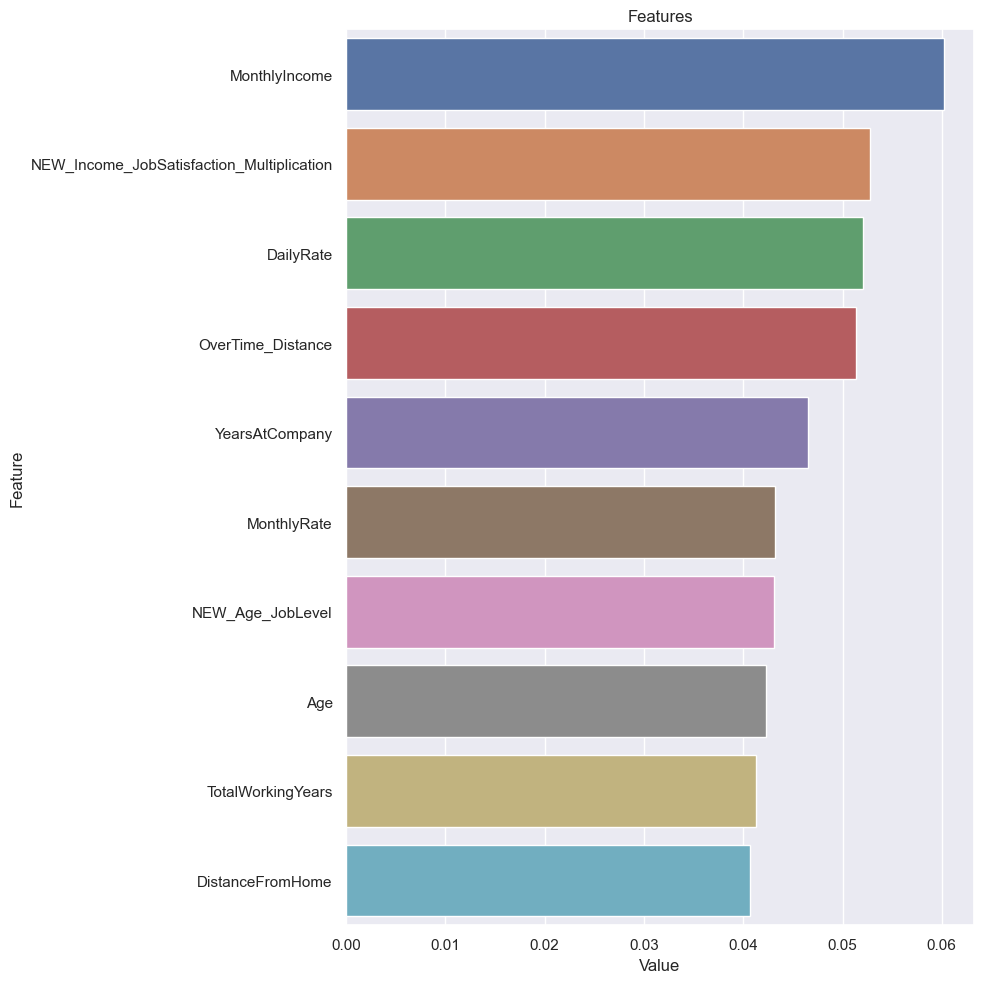

In [435]:
plot_importance(rf,  X_train, num=10)